# imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Data loading and checking

In [ ]:
# Load a DataFrame with a specific version of a CSV

df = kagglehub.dataset_load(

KaggleDatasetAdapter.PANDAS,

"himanshunakrani/student-study-hours",

"score.csv",

)

100%|██████████| 187/187 [00:00<00:00, 413kB/s]


In [ ]:
print(df.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


In [ ]:
X = df[["Hours"]] # See [[]] is creating (25, 1) array which is 2D
y = df["Scores"]  # [] is creating (25,) array which is 1D

print(X.head(4))
print(y.head(4))
print(X.shape)
print(y.shape)

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
0    21
1    47
2    27
3    75
Name: Scores, dtype: int64
(25, 1)
(25,)


# train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

# Prediction

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions)
print(y_test.values)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]
[81 30 21 76 62]


# Visualisation

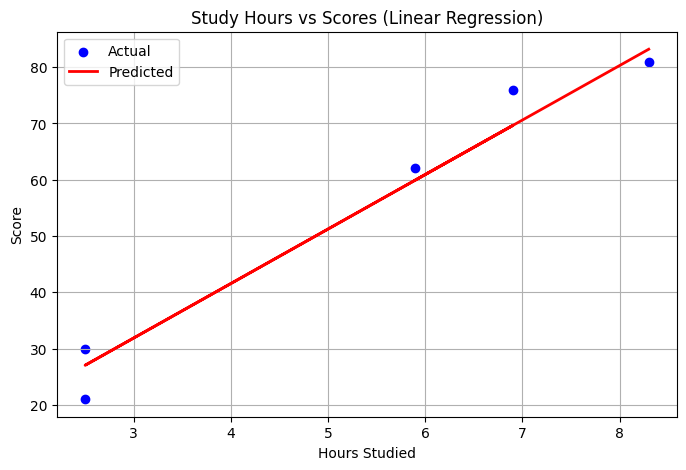

In [ ]:
plt.figure(figsize=(8,5))

# Scatter plot of actual test data
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot regression line (predicted values)
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')

# Labels and title
plt.title('Study Hours vs Scores (Linear Regression)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()

# Bonus

In [ ]:
bonus = model.predict(pd.DataFrame([[5.5]], columns=['Hours'])) # again [[]], not [] because scikit-learn expects a 2D array for features

print(f"Predicted score for 5.5 hours of study: {bonus[0]:.2f}")

Predicted score for 5.5 hours of study: 56.08
